# <font color='orange'> **CS51 Assignment 2: Algorithms and Simulation**</font>



This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.


**You must complete all tasks within this pre-formatted Jupyter notebook. Please follow ALL formatting guidelines and the HC Guidelines in the assignment instructions on Forum (near the top and bottom of the instructions respectively).**


## <font color='orange'> **PART 1**: OPTIMIZATION</font>

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2. It may be helpful to include a map of these cities (either an existing map or create your own).  


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 

**Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective value would be measured and how the decision variables would impact it (~200 words).** 


<font color='orange'>**Answer 1.1**</font>

**Scenario 2**

The objective function for this scenario is to maximize the validation accuracy for correctly diagnosed patients, measured as a percentage of all patients undergoing the validation process of diagnostic test. The objective value is the validation accuracy i.e. how well the diagnostic test performs on previously unseen data. 

The decision variables for this objective function are the easily measurable symptoms that differ from patient to patient and are fed into the objective function as inputs (independent variables). The decision variables for this objective function are:

- White blood cell count (1/cubic milliliter of blood)
- Temperature (degree Celsius)
- Cough severity (no units)
- Headache severity (no units)

All of the decisions variables are quantitative, continuous variables independent of each other. Based on the scatter and the violin plots, WBC count and temperature can be seen as prescriptive variables i.e. they help prescribe the optimal action (classification) for a given patient. They can be seen as qualitatively intracting with the diagnosis by observing the two non-empty set in the scatter plots of the two symptoms for which the diagnosis is different.

The variables are selected because they can be easily measurable. This is important because lack of sophisticated diagnostic tools and limited resources implies an inability to carefully and accurately measure symptoms. Time and cost constraints during viral outbreaks also mean time and wealth cannot be wasted in measuring complicated symptoms. 

These symptoms are chosen as decision variables because they add value to the model i.e. they are not unimportant, irrelevant, or unnecessary variables that only add noise to the data and negatively impact classification accuracy. 

The constraints for the model include the small sample, the ease of measuring of the decision variables, and the subjectivity associated with measuring cough and headache severity. Given the small size, including any more variables would run the risk of overfitting the model. Hence, only four are chosen to improve the fit of the learning algorithm and get the optimal solution with the smallest number of easily measurable variables.

**Optional**

Violin plots are created for each of the decision variables to see if they added any value to the objective function. The use of violin plot is superior to that of scatter plots (particularly for variables like cough and headache severity) because there is significant overlap between the infected and uninfected individuals experiencing the same symptoms. 

This data visualization is particularly helpful in understanding how the infected and uninfected population differs across the four symptoms through both summary statistics and the density of the variables. Unlike the box plots, it also shows how likely the population of the two classes is to have the given value - a helpful trait using which unnecessary variables can be removed from the model. While scatter plots show individual data points, they do not help in visualizing the summary statistics.

The plots show that each of the four symptoms differ enough to be included as decision variables without the threat of adding noise to the data, hence justifying their inclusion.


<AxesSubplot:xlabel='Infected', ylabel='Cough_Severity'>

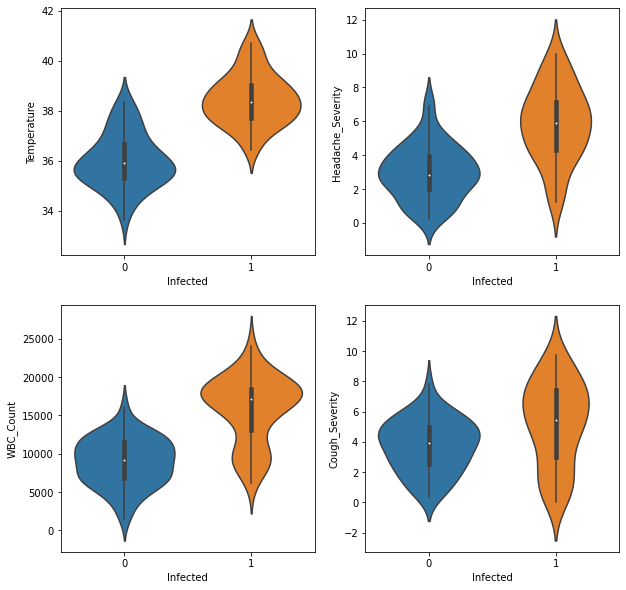

In [38]:
#Source: Essential Classification Algorithms Explained, Annie Yim (2018)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv(r"C:\Users\alina\Downloads\CS51_Assignment_Diagnosis_Data.csv")

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))
sns.violinplot(x="Infected", y="Temperature", data=data, ax=ax1)
sns.violinplot(x="Infected", y="Headache_Severity", data=data, ax=ax2)
sns.violinplot(x="Infected", y="WBC_Count", data=data, ax=ax3)
sns.violinplot(x="Infected", y="Cough_Severity", data=data, ax=ax4)

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, required steps, and the termination condition. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional challenge*: Create a program in Python to implement this optimization process. Please provide a thorough explanation of how the code works, both holistically and using in-line comments. You must also provide at least one “test case” that demonstrates that your code is properly implemented. This test should be something like, “In this case, it's clear that the only possible solution is X; let's check that with our code. Yes, the code outputs X as well, so we can in principle induce that the implementation is correct."

<font color='orange'>**Answer 1.2**</font>

Supervised machine learning algorithm can be used to find the optimal solution in this scenario. The algorithm takes given inputs and target variables of the training data to learn the relationship between the input and the output variables. A classification algorithm is the most appropriate for this scenario because the target variable is categorical i.e. the output is either positive or negative.

One example of such classification algorithm is decision tree algorithm which ientifies the most significant variable and its value which divides the data into the best homogenous sets. Decisions are made recurisvely, in a tree-like model beginning with splitting the data into two sets and continuing to do so based on most significant differentiators. Therefore, this algorithm is a greedy algorithm which looks for the best when making splits without considering the decisions down the path. However, pruning of a decision tree can be considered a brute force approach towards algorithms.

In decision tree, the algorithm considers all the variables and makes a split based on a cut-off threshold. It chooses the split which has lowest entropy compared to parent node and other splits and continues splitting until the termination condition (constraints) are met.

The advantages of decision trees include:
- They are easy to understand because of their simplicity of the model
- They are easy to code and compute
- They are good for exploring data as they compare variables and pick the most significant ones to make the split. Such results can be used to create new features that contribute significantly to the target variable.
- They can be used for both numerical and categorical data.
- They does not require a lot of data cleaning as compared to other algorithms.

The limitations of the decision tree are as follows:
- They are more prone to overfitting than other algorithms. However, this can be mitigated by constraints elaborated further later.
- They might make many redundant splits initially that reach the same conclusion. This problem can be solved by pruning (cutting down redundant nodes) of the tree.

**Optional**
The following program builds a decision tree from the diagnostic data. 70% of the data is used to train the model while 30% is used to test the model. A more sophisticated program divides the data further to have 15% for testing and 15% for validation on unseen data.

As mentioned previously, decision trees are prone to overfitting which can result in high training accuracy and low validation accuracy. At the same time, both the accuracies can be high because of "leaking" of data or the nature of data itself which yields accurate results but does not adequately represents the real-world data. 

To prevent overfitting, both the maximum depth of the tree and the minimum samples to conclude the termination node are set to 10 as constraints. Adjusting this would bring about a change in validation accuracy. Some other factors that can prevent overfitting include:
- Maximum number of terminal nodes
- Maximum features to consider for a split
- Minimum samples for a node split 
- Minimum gini impurity

As can be observed, the decision tree has high training and validation accuracy but the splits beyond the first are redundant as they lead to the same conclusion. This can be controlled by pruning and carefully setting constraints on model parameters.

Training Accuracy score: 91.43 %
Validation Accuracy score: 86.67 %


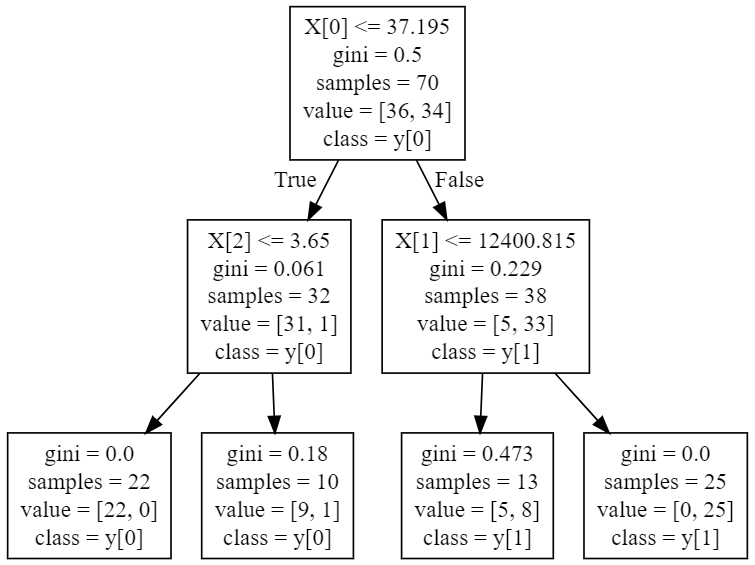

In [39]:
#Learning resources from Essential Classification Algorithms Explained, Annie Yim (2018) and CS51 Session 10

#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#maximum depth of the decision tree 
depth = 10 
#minimum samples to conclude a termination node
dtree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = 10)
#choosing data to build decision tree
x,y = data.drop(['Infected'],axis=1), data['Infected'] 
#dividing data into 70% training data an 30% testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3,
                                                 random_state = 1) 
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

#printing accuracy and validation scores as percentage
print("Training Accuracy score:",round(dtree.score(x_train, y_train)*100,2),"%") 
print("Validation Accuracy score:",round(dtree.score(x_test, y_test)*100,2),"%")


#visualizing the decision tree
from sklearn import tree
tree.export_graphviz(dtree, out_file="tree.dot", class_names = True)

from IPython import display
display.Image(r"C:\Users\alina\Downloads\graphviz (1).png")

## <font color='orange'> **PART 2**: SIMULATION</font>


The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Weeks 7 and 8 of CS51. Check out the class readings to learn about this model. 


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.

2. Identify the relevant **variables** of the model, fully classify what type of variables they are, and explain what they mean in the context of your model. Next, identify appropriate numerical values and units for the **initial values** of the variables. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.

3. Explain what the relevant **parameters** ($b$ and $k$) are and what they mean. For your model, identify and justify appropriate numerical values and units for $b$ and $k$. As above, you may include a well-reasoned estimate using empirical data to support your justification. Further, explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors, in the context of the disease you selected, would reduce or increase these parameters.

4. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

<font color='orange'>**Answer 2.1.1**</font>

1. The disease modelled in this assignment is COVID-19 caused by a virus. 
<br>

2. The variables relevant to the model are: 

**Susceptibles (S)**: The healthy individuals who are at risk of contracting the virus and have no immunity whatsoever. <br>
**Infected (I)**: The individuals infected with the disease and capable of spreading it to the susceptibles through contact. <br>
**Recovered/Removed (R)**: Those who have either recovered or died from the disease and can no longer spread it to others.<br>

All three of these variables are discrete quantitative variables in the real-world but are treated as continuous quantitative variables in the model. This is because the model is based on a set of differential equations the solutions of which are always continuous. They are dependent variables as they change with the progression of time in days (independent variable).

The initial values of the variables are given below: 


S: 1348990000 <br>
I: 38069 <br>
R: 42952922 <br>

These are real-world values as of March 13th, 2022 taken from India. The total population is based on Statista’s estimate for the year 2021. 

Sources: <br>
India—Coronavirus statistics—Worldometer. (n.d.). Retrieved March 14, 2022, from [Worldomters.info](https://www.worldometers.info/coronavirus/country/india/)
<br>
India—Total population 2016-2026. (n.d.). Statista. Retrieved March 14, 2022, from [Statista](https://www.statista.com/statistics/263766/total-population-of-india/)
<br>

3. Parameters:

**b (β):  0.085 per day** 

The transmission rate (b) is the factor which controls new infections per day. It is calculated by multiplying the average number of contacts per person per day with the probability of contracting the susceptible contracting the disease from an infected person. The value 0.085 means that every infected person gives rise to 0.085 new infections per day. This means, on average, for every infected person a susceptible will become infected every eleven days. 

An increase in infection rate would mean higher occurrences of infection, meaning new infections would emerge rapidly (less than eleven days) resulting in greater spread of virus from an infected to a susceptible individual and vice versa.  Given the recovery rate remains the same, the increase in infection rate will bring about an increase in the number of infected individuals and a decrease in the number of susceptible individuals. 

**What would increase b?**
-	Mutation of the virus resulting in higher infectiousness (increasing probability of transferring the virus per contact)
-	Emergence of a new disease that increases susceptibility 
-	Increase in susceptible through births to infected individuals, repatriation of infected individuals from other countries, reduced immunity
-	Increase in average number of contacts per person by protests, rallies, elections, parties

**What would reduce b?**
-	Decrease in susceptibles because of presence of underlying immunity (as was the case between malaria and sickle cell anemia)
-	Decrease in average number of contacts per person by government-led stringent protective measures such as lockdowns

**k (γ): 0.062 per day**


Recovery rate (k) is the factor which controls removal of infections per day. It is calculated by reciprocating the number of days during which an infected person can pass the disease on to the susceptible. The value 0.062 means that every day 0.062 of the infected individuals recover. This means that, on average, one infected individual recovers every sixteen days.

An increase in recovery rate would mean that infected individuals recover faster (in less than sixteen days) and vice versa. Given the infection rate status the same, an increase in recovery rate would mean a reduction in the number of infected individuals.


**What would increase k?**
-	Development of a drug which reduces the infected period meaning people recover quickly
-	Stringent quarantining which would prevent contacts and hence indirectly impacting the number of days during which an infected can pass it on (because k is the reciprocal of that number)
-	A mutation which immediately kills individuals so deaths increase and hence k increases

**What would reduce k?**
- A stronger strain of the virus resulting in higher infectiousness
- Sudden immunity of the virus against any available treatment
- Presence of underlying co-morbid diseases






#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify the inputs, outputs, and steps that the algorithm takes, and consider the role of the step size (`h`) in the algorithm. 

<font color='orange'>**Answer 2.1.2**</font>

Euler’s method is an iterative method of approximating a numerical solution to an analytical problem. It functions as a simulation algorithm as it takes in inputs, processes them until the termination condition is met, and gives out an output. Euler’s method achieves numerical solution via simulation by starting with a function, initializing variables, calculating the initial solution using initial values, adding the results to the initial values to compute “new” ones from the “old” ones, and then repeating the process with each “new” value until the termination condition (end of the interval) is met. The number of iterations i.e., how many times the process is repeated depends on the step size (h) in the algorithm, which is the smaller sub-division of the entire interval for which the numerical solution has to be found. The smaller the step size, the closer the numerical approximation to the analytical solution. Graphically, this means computing the functions for tangent lines over a certain distance to approximate a solution.

Solving SIR differential equations through Euler’s method means calculating the rate of change in the population of the susceptible, infected, and recovered individuals in a system per unit time. As each of the three populations change with respect to time, Euler’s method updates the number on every iteration and approximates the function based on each update. The smaller the time interval (step size), the better the approximation. 

The inputs of the Euler’s methods include the function f(x,y), the initial x and y values, the termination condition, step size, and the total number of steps/iterations. The output is the approximation of the function.


#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Define a function that implements a numerical simulation to derive the implications of your model using Euler’s method in Python. Your simulation must generate at least one relevant visualization of the disease dynamics (see required analysis below), including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

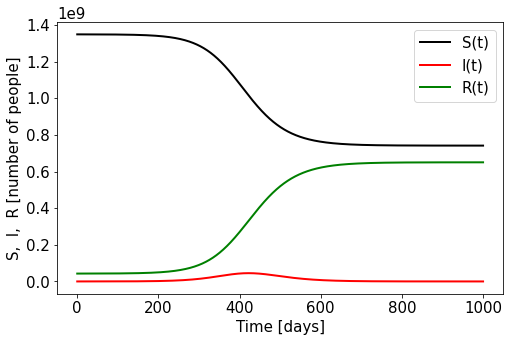

Fig.1: SIR model prediction of COVID-19 progression across days for number of people in billions.


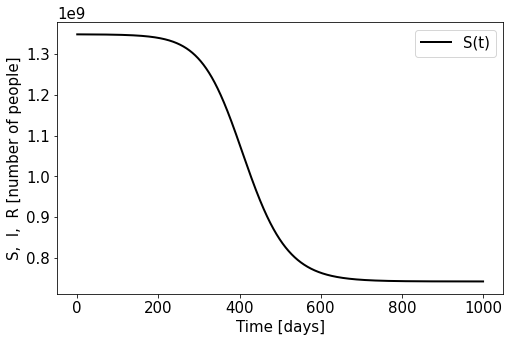

Fig.2: Model prediction for change in number of susceptible individuals in billions with respect to time in days.


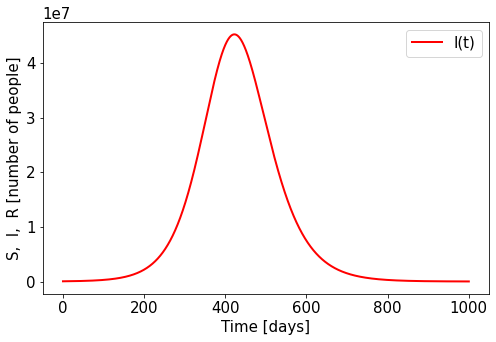

Fig.3: : Model prediction for change in number of infected individuals in ten millions with respect to time in days.


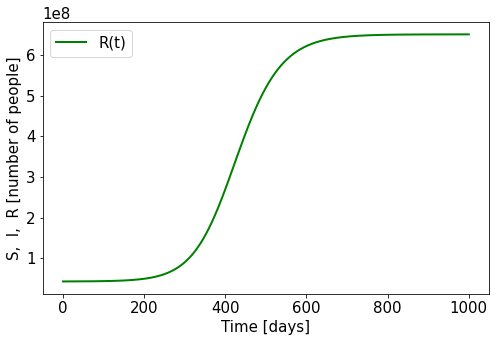

Fig.4: Model prediction for change in number of recovered/removed individuals with respect to time in days.


In [40]:
#Source: CS51: Session 7.2

#imports libraries:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]



#defines a function for SIR simulation through Euler's method:
def SIR_Euler(b,k,initial_conds):
    t0 = 0 # initial time in days
    t_end = 1000  # final time in days

    h = 0.1 # step size (time interval in days)
    steps = int((t_end - t0)/h + 1) # number of steps

    # variables:
    t = np.linspace(t0, t_end, steps) # storing t values
    S = np.zeros(steps) # for storing S values
    I = np.zeros(steps) # for storing I values
    R = np.zeros(steps) #for storing R values

    # initial conditions at t0:
    S[0] = initial_conds[0] #susceptible population 
    I[0] = initial_conds[1] #infective population 
    R[0] = initial_conds[2] #recovered/removed population
    N = S[0] + I[0] + R[0]  #total population
    
    ## differential equations for Euler's method
    for n in range(steps-1): # range(start, stop, step)
        S[n+1] = S[n] - b*h*S[n]*I[n]/N #new infectives minus initial susceptibles 
        I[n+1] = I[n] + h*((b*S[n]*I[n])/N - k*I[n]) #new recovered/removed minus initial infectives plus new infecteds
        R[n+1] = R[n] + h*(k*I[n]) #initial recovered/removed plus new recovered/removed
        
        
    #plots a graph with all three differential equations: 
    
    plt.plot(t,S,linewidth=2, color = "black", label='S(t)')
    plt.plot(t,I,linewidth=2, color = "red", label='I(t)')
    plt.plot(t,R,linewidth=2, color = "green", label='R(t)')
    plt.xlabel('Time [days]')
    plt.ylabel('S,  I,  R [number of people]')
    plt.legend(loc='best')
    plt.show()
    print("Fig.1: SIR model prediction of COVID-19 progression across days for number of people in billions.")
    
    #only susceptibles
    
    plt.plot(t,S,linewidth=2, color = "black", label='S(t)')
    plt.xlabel('Time [days]')
    plt.ylabel('S,  I,  R [number of people]')
    plt.legend(loc='best')
    plt.show()
    print("Fig.2: Model prediction for change in number of susceptible individuals in billions with respect to time in days.")
    
    
    #only infectives
    
    plt.plot(t,I,linewidth=2, color = "red", label='I(t)')
    plt.xlabel('Time [days]')
    plt.ylabel('S,  I,  R [number of people]')
    plt.legend(loc='best')
    plt.show()
    print("Fig.3: : Model prediction for change in number of infected individuals in ten millions with respect to time in days.")
    
    #only recovered/removed
    
    plt.plot(t,R,linewidth=2, color = "green", label='R(t)')
    plt.xlabel('Time [days]')
    plt.ylabel('S,  I,  R [number of people]')
    plt.legend(loc='best')
    plt.show()
    print("Fig.4: Model prediction for change in number of recovered/removed individuals with respect to time in days.")

   

#parameters b and k respectively:
infection_rate = 0.085 
recovery_rate = 0.062 

# initial conditions: 
S0 = 1348990000 
I0 = 38069
R0 = 42952922
initial_vals = [S0, I0, R0]

# call the function to run the simulation
SIR_Euler(b=infection_rate, k=recovery_rate, initial_conds=initial_vals)



#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should re-run the simulation above multiple times with varying parameter inputs ($b$ and $k$) and observe the behavior of your model. Include at least two additional visualizations here to support your answer. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 2.1.1.3 above)?  

- *Optional*: include at least one multidimensional phase space plot and provide a full interpretation of what it shows.

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


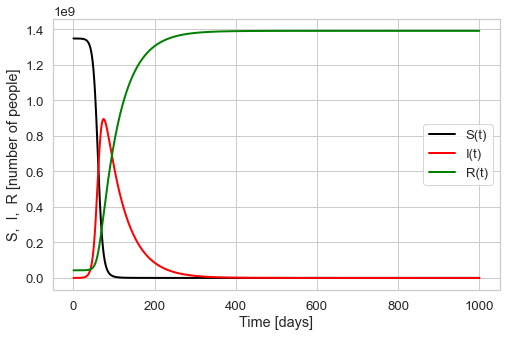

Fig.1: SIR model prediction of COVID-19 progression across days for number of people in billions.


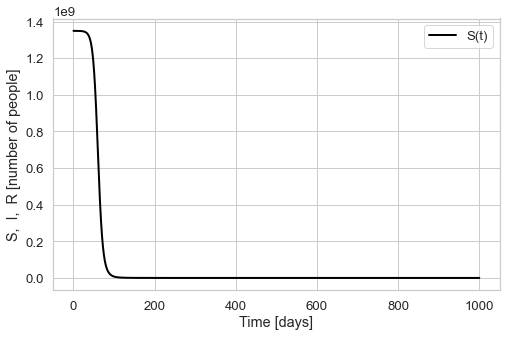

Fig.2: Model prediction for change in number of susceptibles in billions with respect to time in days.


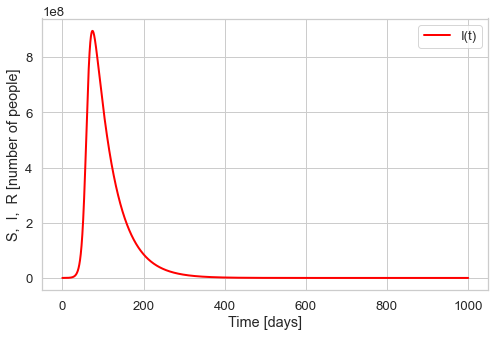

Fig.3: : Model prediction for change in number of infectives in ten millions with respect to time in days.


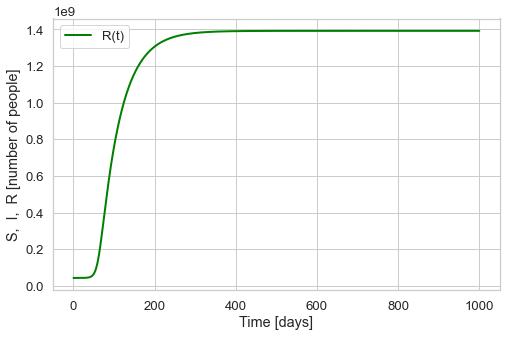

Fig.4: Model prediction for change in number of recovered/removed in hundred millions with respect to time in days.


In [163]:
#high infection and low recovery rate
infection_rate = 0.2 
recovery_rate = 0.02

 
S0 = 1348990000 
I0 = 38069
R0 = 42952922
initial_vals = [S0, I0, R0]


SIR_Euler(b=infection_rate, k=recovery_rate, initial_conds=initial_vals)



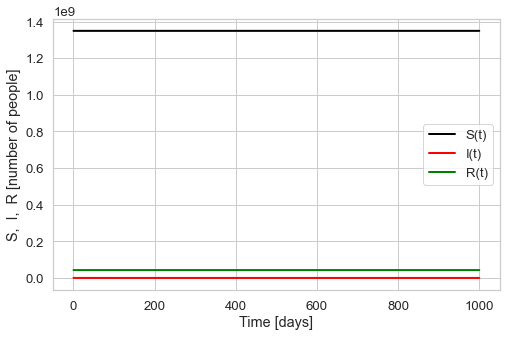

Fig.1: SIR model prediction of COVID-19 progression across days for number of people in billions.


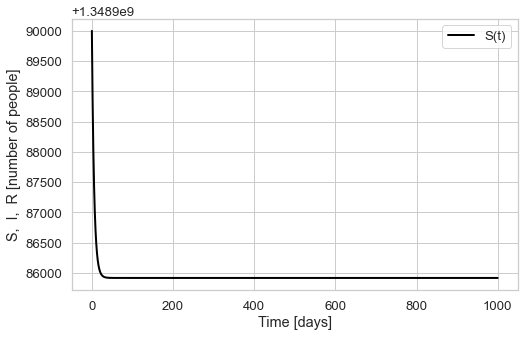

Fig.2: Model prediction for change in number of susceptibles in billions with respect to time in days.


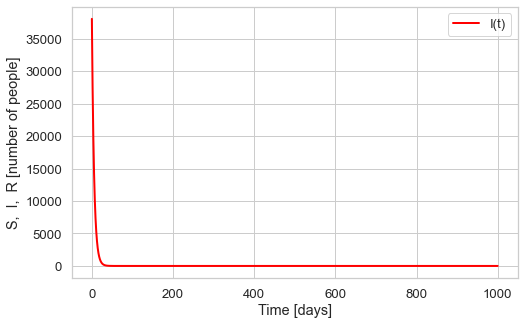

Fig.3: : Model prediction for change in number of infectives in ten millions with respect to time in days.


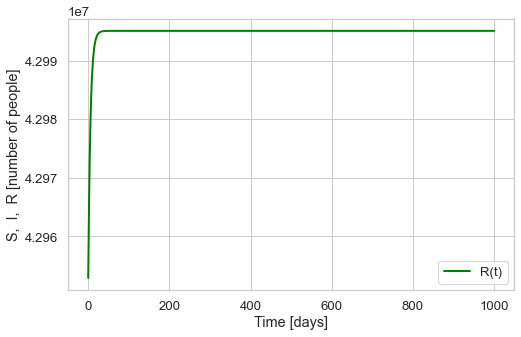

Fig.4: Model prediction for change in number of recovered/removed in hundred millions with respect to time in days.


In [164]:
#low infection and high recovery rate
infection_rate = 0.02 
recovery_rate = 0.2


S0 = 1348990000 
I0 = 38069
R0 = 42952922
initial_vals = [S0, I0, R0]


SIR_Euler(b=infection_rate, k=recovery_rate, initial_conds=initial_vals)

<font color='orange'>**Answer 2.1.4**</font>

The SIR model is based on the following assumptions about the disease:

•	Every single infected person either recovers (or die) within the set time frame (recovery rate).<br>

•	The duration of infection is the same for everyone. <br>

•	Recovery means immunity from reinfection and non-contagiousness. <br>

•	Homogenous mixing of the population. <br>

•	Only a certain fraction of contacts with the disease results in infections. <br>

•	The probability of getting infected given contact is the same for everyone. <br>

•	The disease is only spread through contacts and not via proxies such as use of utensils, breathing the same air, sewage, food, etc.<br>

•	The disease can only infect and spread through humans.<br>

•	The disease is spread within a closed system meaning that the total size of the population, which equals the sum S + I + R, does not change. <br>

•	No increase in population via births or immigration. <br>

•	The virus does not mutate or evolve. <br>

•	Deaths count as recoveries and can only happen as a result of the disease not through any other means. <br>


The presence of these model assumptions provides a very broad insight into the system which cannot be used for targeted interventions. The predictions are overly simplified as the model neither captures real-life complexities nor accounts for many varying factors such as age structures, contact patterns, incubation time, prevention methods, and behavioral tendencies of individuals. Factors like testing criteria, accuracy of test results, and possibility of latent cases are some other real-life factors the model does not measure. Similarly, the model treats the disease as static instead of dynamic as it is based on constant parameters (infection and recovery rates) instead time-dependent ones, failing to model the evolution of the disease with the progression of time. 

All three simulations show a "flattened curve" after a certain time in the aftermath of an "infection peak". The graphs remain the same after that as the model treats the disease as static instead of dynamic, controlled by time-independent parameters that do not evolve with the virus. The various COVID-19 waves prove this to be untrue as the virus evolves, people get reinfected, and herd immunity diminishes. To plan and execute interventions, a more sophisticated model is needed which would account for some of the other most important variables such as mortality and reinfection rates, variable susceptibility of individuals, and mixing patterns. 

Even though the SIR model does not accurately represent the real world, it is useful for visualizing the broad impacts of COVID-19 pandemic.It can be noted that the infection and recovery rate determines how quickly the system can defeat the virus. With a high infection but low recovery rate, the curves are flattened in a year. In the opposite case, the system normalizes within a month. But with the real-life COVID-19 infection and recovery rates, the model predicts the lifespan of a single, non-mutating virus to be at least two years. Regardless, the graphs provide important insight into which aspect of the pandemic is in need of intervention. For example, preventive measures such as social distancing and PPEs can be used to decrease infection rate thereby improving the spread of the disease. 



### **Part 2.2 Agent-Based Modeling and Simulation (*OPTIONAL*)**

This part of the assignment is optional and will only be scored if completed effectively (score of 4 or 5). It is a valuable chance to compare the simulation above with the agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). 

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 *Optional*: Simulation Comparison (~250 words) [#modeling]

After fully exploring the NetLogo model and running multiple simulations, summarize how it compares to your Python SIR simulation above. Aim to identify the main similarities, the major differences, and at least advantage for each one. Comment on which you believe to be a more realistic representation of nature, justifying your reasoning.



<font color='orange'>**Answer 2.2.1 here**</font>

#### 2.2.2 *Optional challenge*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [ ]:
# Add code to complete the optional implementation 
# Add more cells as needed to explain your work

## <font color='orange'>**REFLECTION**</font>

*In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you.*

Being able to model and simulate complex real-life phenomenon enables us to observe, understand, and control the impacts of those phenomenon on our lives. Modeling, simulations, and algorithms are crucial for planning interventions that actually work and bear good results. From the changes in the chemical composition of the galaxy to the movement of the tectonic plates and emergence of pandemics, this unit showed how much of the human life depends on our ability to understand and control the world around us. Models and simulations are the keys to doing just that.

## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.